In [1]:
from utilities import *
from plot_utilities import *

np.random.seed(42)

Sample size: 10
Sorting time: 0.000022 seconds
Min-finding time: 0.001097 seconds
----------------------------------------
Sample size: 100
Sorting time: 0.000011 seconds
Min-finding time: 0.001254 seconds
----------------------------------------
Sample size: 1000
Sorting time: 0.000093 seconds
Min-finding time: 0.000951 seconds
----------------------------------------
Sample size: 10000
Sorting time: 0.001154 seconds
Min-finding time: 0.002932 seconds
----------------------------------------
Sample size: 100000
Sorting time: 0.019486 seconds
Min-finding time: 0.027841 seconds
----------------------------------------
Sample size: 1000000
Sorting time: 0.159226 seconds
Min-finding time: 0.259229 seconds
----------------------------------------
Sample size: 10000000
Sorting time: 1.751495 seconds
Min-finding time: 4.008326 seconds
----------------------------------------
Sample size: 100000000
Sorting time: 27.924532 seconds
Min-finding time: 52.144090 seconds
---------------------------

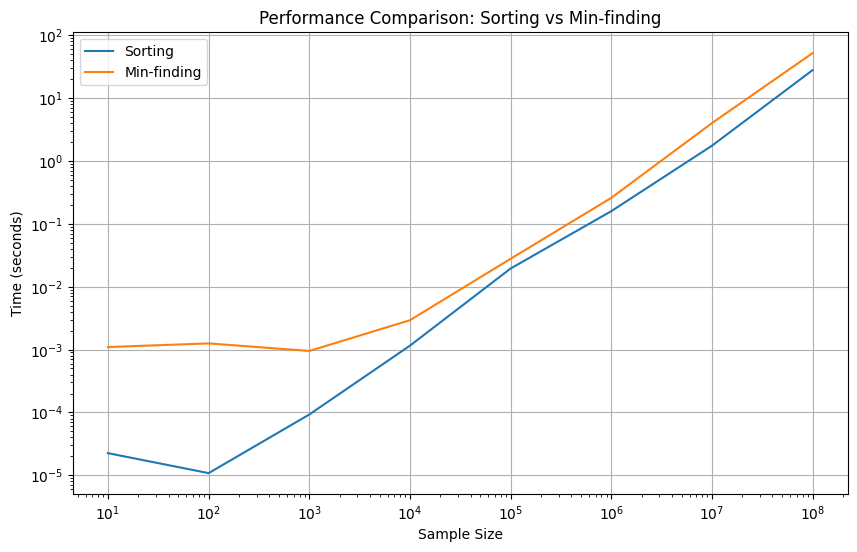

In [3]:
import numpy as np
from scipy import stats
import timeit
import matplotlib.pyplot as plt

def kstest_custom(x, cdf, return_loc=False):
    n = len(x)
    x = np.sort(x)
    cdfvals = cdf(x)
    dplus, dminus = (np.arange(1.0, n + 1) / n - cdfvals), (cdfvals - np.arange(0.0, n)/n)
    plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
    loc_max, loc_min = x[plus_amax], x[minus_amax]
    d = max(dplus[plus_amax], dminus[minus_amax])
    if return_loc:
        if d == plus_amax:
            return d, stats.kstwo.sf(d, n), loc_max
        else:
            return d, stats.kstwo.sf(d, n), loc_min
    return d, stats.kstwo.sf(d, n)

def run_performance_test(max_exponent):
    sample_sizes = [10**i for i in range(1, max_exponent + 1)]
    sorting_times = []
    min_finding_times = []

    for size in sample_sizes:
        # Generate random data and CDF function
        data = np.random.normal(0, 1, size)
        cdf = stats.norm.cdf

        # Measure sorting time
        sorting_time = timeit.timeit(lambda: np.sort(data), number=5) / 5

        # Measure min-finding time (everything after sorting)
        def min_finding():
            sorted_data = np.sort(data)
            cdfvals = cdf(sorted_data)
            dplus, dminus = (np.arange(1.0, size + 1) / size - cdfvals), (cdfvals - np.arange(0.0, size)/size)
            plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
            loc_max, loc_min = sorted_data[plus_amax], sorted_data[minus_amax]
            d = max(dplus[plus_amax], dminus[minus_amax])
            return d, stats.kstwo.sf(d, size)

        min_finding_time = timeit.timeit(min_finding, number=5) / 5

        sorting_times.append(sorting_time)
        min_finding_times.append(min_finding_time)

        print(f"Sample size: {size}")
        print(f"Sorting time: {sorting_time:.6f} seconds")
        print(f"Min-finding time: {min_finding_time:.6f} seconds")
        print("-" * 40)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, sorting_times, label='Sorting')
    plt.plot(sample_sizes, min_finding_times, label='Min-finding')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison: Sorting vs Min-finding')
    plt.legend()
    plt.grid(True)
    plt.show()

# Specify the maximum exponent for the sample size (10^n)
max_exponent = 8  # Change this value to adjust the range

run_performance_test(max_exponent)

   Sample Size  Sorting Time  Min-finding Time  Total Time
0           10      0.000014          0.000610    0.000470
1          100      0.000025          0.001573    0.000864
2         1000      0.000061          0.000545    0.000527
3        10000      0.001025          0.002102    0.002344
4       100000      0.012460          0.024443    0.023285
5      1000000      0.145741          0.295097    0.260411


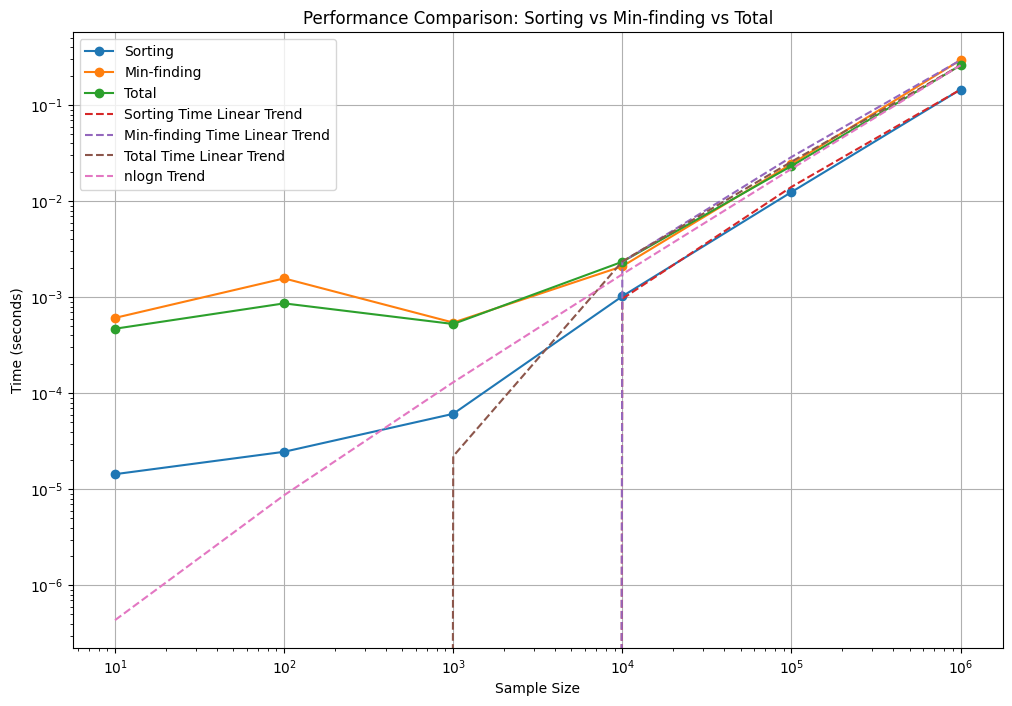

In [4]:
import numpy as np
from scipy import stats
import timeit
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def kstest_custom(x, cdf, return_loc=False):
    n = len(x)
    x = np.sort(x)
    cdfvals = cdf(x)
    dplus, dminus = (np.arange(1.0, n + 1) / n - cdfvals), (cdfvals - np.arange(0.0, n)/n)
    plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
    loc_max, loc_min = x[plus_amax], x[minus_amax]
    d = max(dplus[plus_amax], dminus[minus_amax])
    if return_loc:
        if d == plus_amax:
            return d, stats.kstwo.sf(d, n), loc_max
        else:
            return d, stats.kstwo.sf(d, n), loc_min
    return d, stats.kstwo.sf(d, n)

def nlogn(n, a):
    return a * n * np.log(n)

def linear(x, a, b):
    return a * x + b

def run_performance_test(max_exponent):
    sample_sizes = [10**i for i in range(1, max_exponent + 1)]
    results = []

    for size in sample_sizes:
        # Generate random data and CDF function
        data = np.random.normal(0, 1, size)
        cdf = stats.norm.cdf

        # Measure sorting time
        sorting_time = timeit.timeit(lambda: np.sort(data), number=5) / 5

        # Measure min-finding time (everything after sorting)
        def min_finding():
            sorted_data = np.sort(data)
            cdfvals = cdf(sorted_data)
            dplus, dminus = (np.arange(1.0, size + 1) / size - cdfvals), (cdfvals - np.arange(0.0, size)/size)
            plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
            loc_max, loc_min = sorted_data[plus_amax], sorted_data[minus_amax]
            d = max(dplus[plus_amax], dminus[minus_amax])
            return d, stats.kstwo.sf(d, size)

        min_finding_time = timeit.timeit(min_finding, number=5) / 5

        # Measure total function time
        total_time = timeit.timeit(lambda: kstest_custom(data, cdf), number=5) / 5

        results.append({
            'Sample Size': size,
            'Sorting Time': sorting_time,
            'Min-finding Time': min_finding_time,
            'Total Time': total_time
        })

    # Create DataFrame
    df = pd.DataFrame(results)
    print(df)

    # Plot results
    plt.figure(figsize=(12, 8))
    plt.plot(df['Sample Size'], df['Sorting Time'], 'o-', label='Sorting')
    plt.plot(df['Sample Size'], df['Min-finding Time'], 'o-', label='Min-finding')
    plt.plot(df['Sample Size'], df['Total Time'], 'o-', label='Total')

    # Fit linear trends
    for column in ['Sorting Time', 'Min-finding Time', 'Total Time']:
        popt, _ = curve_fit(linear, df['Sample Size'], df[column])
        plt.plot(df['Sample Size'], linear(df['Sample Size'], *popt), '--', 
                 label=f'{column} Linear Trend')

    # Fit nlogn trend
    popt, _ = curve_fit(nlogn, df['Sample Size'], df['Total Time'])
    plt.plot(df['Sample Size'], nlogn(df['Sample Size'], *popt), '--', 
             label='nlogn Trend')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison: Sorting vs Min-finding vs Total')
    plt.legend()
    plt.grid(True)
    plt.show()

# Specify the maximum exponent for the sample size (10^n)
max_exponent = 6  # Change this value to adjust the range

run_performance_test(max_exponent)

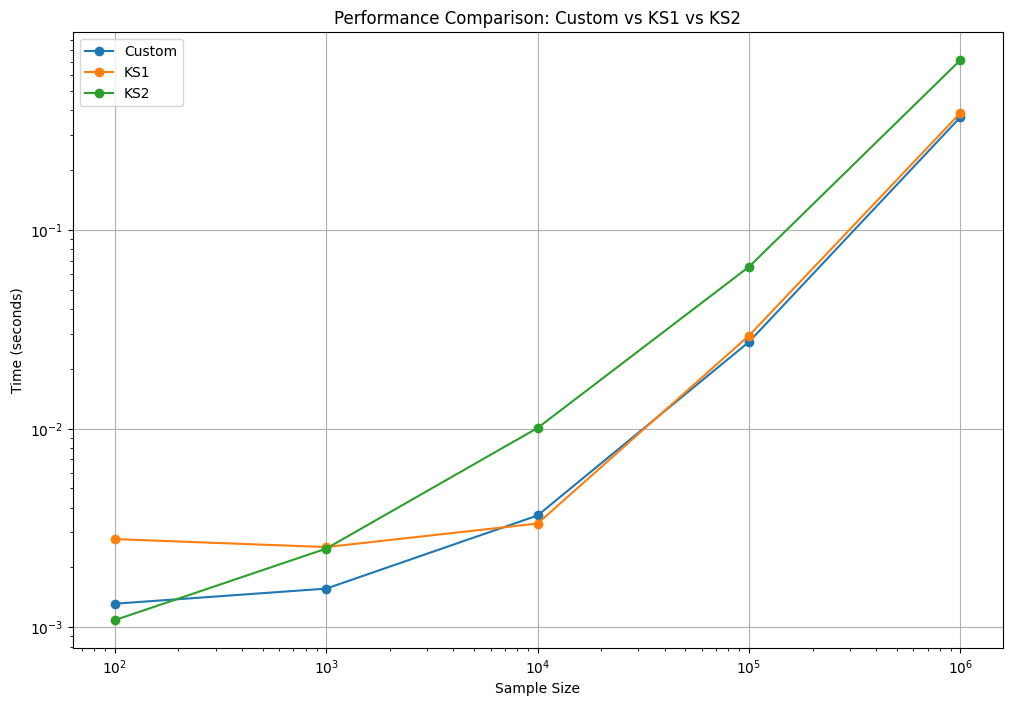

Full Results:
   Sample Size  Custom Time  KS1 Time  KS2 Time  True Custom Stat  \
0          100     0.001315  0.002779  0.001087          0.085322   
1         1000     0.001566  0.002534  0.002489          0.031945   
2        10000     0.003653  0.003327  0.010068          0.007294   
3       100000     0.027268  0.029316  0.065097          0.003321   
4      1000000     0.368142  0.386714  0.713454          0.000910   

   True KS1 Stat  True KS2 Stat  Custom 90.0% Stat  KS1 90.0% Stat  \
0       0.085322       0.150000           0.079766        0.079766   
1       0.031945       0.065000           0.035485        0.035485   
2       0.007294       0.009000           0.005550        0.005550   
3       0.003321       0.004160           0.003354        0.003354   
4       0.000910       0.001402           0.001050        0.001050   

   KS2 90.0% Stat  Custom 50.0% Stat  KS1 50.0% Stat  KS2 50.0% Stat  \
0        0.144444           0.160542        0.160542        0.180000   
1     

In [5]:
def kstest_custom(x, cdf, return_loc=False):
    n = len(x)
    x = np.sort(x)
    cdfvals = cdf(x)
    dplus, dminus = (np.arange(1.0, n + 1) / n - cdfvals), (cdfvals - np.arange(0.0, n)/n)
    plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
    loc_max, loc_min = x[plus_amax], x[minus_amax]
    d = max(dplus[plus_amax], dminus[minus_amax])
    if return_loc:
        if d == plus_amax:
            return d, stats.kstwo.sf(d, n), loc_max
        else:
            return d, stats.kstwo.sf(d, n), loc_min
    return d, stats.kstwo.sf(d, n)

def run_performance_test(max_exponent):
    sample_sizes = [10**i for i in range(2, max_exponent + 1)]
    results = []
    subsample_percentages = [0.9, 0.5, 0.2]

    for size in sample_sizes:
        # Generate random data
        data1 = np.random.normal(0, 1, size)
        data2 = np.random.normal(0, 1, size)
        cdf = stats.norm.cdf

        # Measure times for different methods
        custom_time = timeit.timeit(lambda: kstest_custom(data1, cdf), number=5) / 5
        ks1_time = timeit.timeit(lambda: stats.ks_1samp(data1, cdf), number=5) / 5
        ks2_time = timeit.timeit(lambda: stats.ks_2samp(data1, data2), number=5) / 5

        # Calculate true KS statistics
        true_custom_stat = kstest_custom(data1, cdf)[0]
        true_ks1_stat = stats.ks_1samp(data1, cdf).statistic
        true_ks2_stat = stats.ks_2samp(data1, data2).statistic

        result = {
            'Sample Size': size,
            'Custom Time': custom_time,
            'KS1 Time': ks1_time,
            'KS2 Time': ks2_time,
            'True Custom Stat': true_custom_stat,
            'True KS1 Stat': true_ks1_stat,
            'True KS2 Stat': true_ks2_stat
        }

        # Subsampling analysis
        for percentage in subsample_percentages:
            subsample_size = int(size * percentage)
            subsample1 = np.random.choice(data1, subsample_size, replace=False)
            subsample2 = np.random.choice(data2, subsample_size, replace=False)

            sub_custom_stat = kstest_custom(subsample1, cdf)[0]
            sub_ks1_stat = stats.ks_1samp(subsample1, cdf).statistic
            sub_ks2_stat = stats.ks_2samp(subsample1, subsample2).statistic

            result.update({
                f'Custom {percentage*100}% Stat': sub_custom_stat,
                f'KS1 {percentage*100}% Stat': sub_ks1_stat,
                f'KS2 {percentage*100}% Stat': sub_ks2_stat
            })

        results.append(result)

    return pd.DataFrame(results)

def plot_results(df):
    plt.figure(figsize=(12, 8))
    plt.plot(df['Sample Size'], df['Custom Time'], 'o-', label='Custom')
    plt.plot(df['Sample Size'], df['KS1 Time'], 'o-', label='KS1')
    plt.plot(df['Sample Size'], df['KS2 Time'], 'o-', label='KS2')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison: Custom vs KS1 vs KS2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Specify the maximum exponent for the sample size (10^n)
max_exponent = 6  # Change this value to adjust the range

# Run the performance test
results_df = run_performance_test(max_exponent)

# Plot the results
plot_results(results_df)

# Display the full results DataFrame
print("Full Results:")
print(results_df)

# Create a summary DataFrame for KS statistics
ks_stats_df = results_df[['Sample Size', 'True Custom Stat', 'True KS1 Stat', 'True KS2 Stat',
                          'Custom 90.0% Stat', 'KS1 90.0% Stat', 'KS2 90.0% Stat',
                          'Custom 50.0% Stat', 'KS1 50.0% Stat', 'KS2 50.0% Stat',
                          'Custom 20.0% Stat', 'KS1 20.0% Stat', 'KS2 20.0% Stat']]

print("\nKS Statistics Summary:")
print(ks_stats_df)

In [9]:
cdf = compute_prior_cdf(0.9, 1.6, 10000)

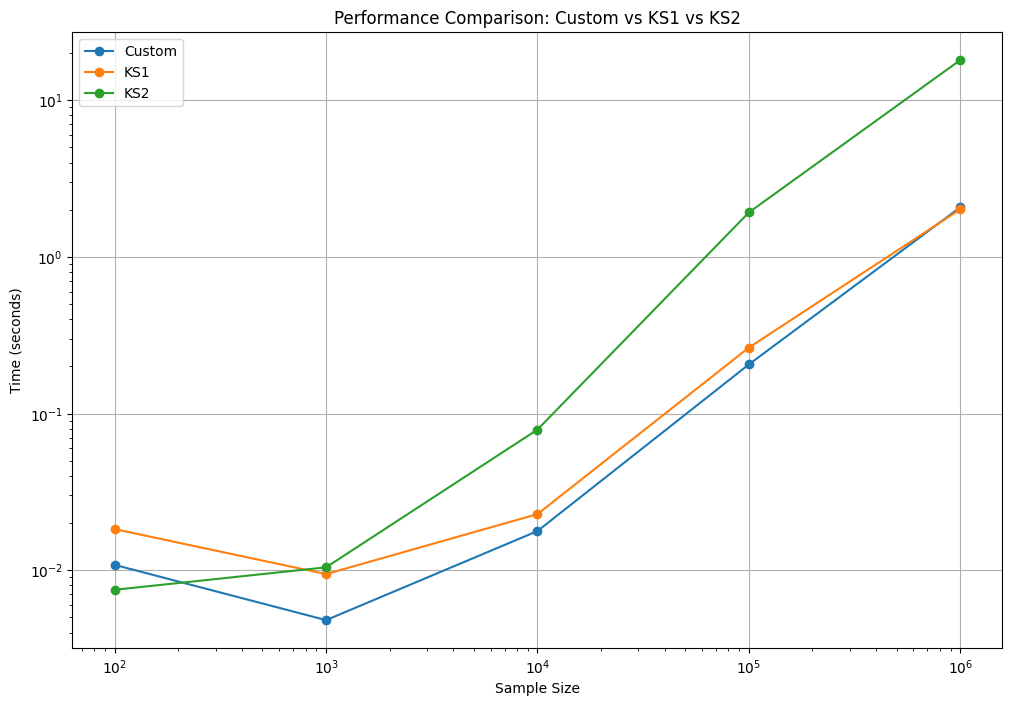

Full Results:
   Sample Size  Custom Time  KS1 Time   KS2 Time  True Custom Stat  \
0          100     0.010812  0.018288   0.007500          0.074799   
1         1000     0.004802  0.009444   0.010432          0.027677   
2        10000     0.017772  0.022800   0.078990          0.009381   
3       100000     0.205661  0.263382   1.919450          0.002801   
4      1000000     2.070031  2.010961  18.019757          0.001029   

   True KS1 Stat  True KS2 Stat  Custom 90.0% Stat  KS1 90.0% Stat  \
0       0.074799       0.110000           0.079811        0.079811   
1       0.027677       0.045333           0.029736        0.029736   
2       0.009381       0.028533           0.011739        0.011739   
3       0.002801       0.019287           0.002745        0.002745   
4       0.001029       0.018888           0.001056        0.001056   

   KS2 90.0% Stat  Custom 50.0% Stat  KS1 50.0% Stat  KS2 50.0% Stat  \
0        0.111111           0.125221        0.125221        0.120000   


In [17]:
def kstest_custom(x, cdf, return_loc=False):
    n = len(x)
    x = np.sort(x)
    cdfvals = cdf(x)
    dplus, dminus = (np.arange(1.0, n + 1) / n - cdfvals), (cdfvals - np.arange(0.0, n)/n)
    plus_amax, minus_amax = dplus.argmax(), dminus.argmax()
    loc_max, loc_min = x[plus_amax], x[minus_amax]
    d = max(dplus[plus_amax], dminus[minus_amax])
    if return_loc:
        if d == plus_amax:
            return d, stats.kstwo.sf(d, n), loc_max
        else:
            return d, stats.kstwo.sf(d, n), loc_min
    return d, stats.kstwo.sf(d, n)

def run_performance_test(max_exponent, num_repetitions, cdf):
    sample_sizes = [10**i for i in range(2, max_exponent + 1)]
    results = []
    subsample_percentages = [0.9, 0.5, 0.2]

    for size in sample_sizes:
        result = {'Sample Size': size}
        
        for _ in range(num_repetitions):
            # Generate random data
            data1 = sample_prior(0.9, 1.6, size)
            data2 = sample_prior(0.95, 1.50, size)
            #cdf = compute_prior_cdf(0.9, 1.6, 10000)

            # Measure times and calculate statistics for different methods
            custom_time = timeit.timeit(lambda: kstest_custom(data1, cdf), number=10)
            custom_stat = kstest_custom(data1, cdf)[0]
            
            ks1_time = timeit.timeit(lambda: stats.ks_1samp(data1, cdf), number=10)
            ks1_stat = stats.ks_1samp(data1, cdf).statistic
            
            ks2_time = timeit.timeit(lambda: stats.ks_2samp(data1, data2), number=10)
            ks2_stat = stats.ks_2samp(data1, data2).statistic

            # Accumulate results
            for key, value in [('Custom Time', custom_time), ('KS1 Time', ks1_time), ('KS2 Time', ks2_time),
                               ('True Custom Stat', custom_stat), ('True KS1 Stat', ks1_stat), ('True KS2 Stat', ks2_stat)]:
                result[key] = result.get(key, 0) + value

            # Subsampling analysis
            for percentage in subsample_percentages:
                subsample_size = int(size * percentage)
                subsample1 = np.random.choice(data1, subsample_size, replace=False)
                subsample2 = np.random.choice(data2, subsample_size, replace=False)

                sub_custom_stat = kstest_custom(subsample1, cdf)[0]
                sub_ks1_stat = stats.ks_1samp(subsample1, cdf).statistic
                sub_ks2_stat = stats.ks_2samp(subsample1, subsample2).statistic

                for key, value in [(f'Custom {percentage*100}% Stat', sub_custom_stat),
                                   (f'KS1 {percentage*100}% Stat', sub_ks1_stat),
                                   (f'KS2 {percentage*100}% Stat', sub_ks2_stat)]:
                    result[key] = result.get(key, 0) + value

        # Average the results
        for key in result:
            if key != 'Sample Size':
                result[key] /= num_repetitions

        results.append(result)

    return pd.DataFrame(results)

def plot_results(df):
    plt.figure(figsize=(12, 8))
    plt.plot(df['Sample Size'], df['Custom Time'], 'o-', label='Custom')
    plt.plot(df['Sample Size'], df['KS1 Time'], 'o-', label='KS1')
    plt.plot(df['Sample Size'], df['KS2 Time'], 'o-', label='KS2')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison: Custom vs KS1 vs KS2')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_percent_error(df):
    error_df = pd.DataFrame()
    error_df['Sample Size'] = df['Sample Size']
    
    for test in ['Custom', 'KS1', 'KS2']:
        true_col = f'True {test} Stat'
        for percent in [90.0, 50.0, 20.0]:
            sub_col = f'{test} {percent}% Stat'
            error_col = f'{test} {percent}% Error'
            error_df[error_col] = abs(df[sub_col] - df[true_col]) / df[true_col] * 100

    return error_df

# Specify the maximum exponent for the sample size (10^n) and number of repetitions
max_exponent = 6  # Change this value to adjust the range
num_repetitions = 3  # Number of times to repeat each test
# cdf = compute_prior_cdf(0.9, 1.6, 10000)

# Run the performance test
results_df = run_performance_test(max_exponent, num_repetitions, cdf)

# Plot the results
plot_results(results_df)

# Display the full results DataFrame
print("Full Results:")
print(results_df)

# Create a summary DataFrame for KS statistics
ks_stats_df = results_df[['Sample Size', 'True Custom Stat', 'True KS1 Stat', 'True KS2 Stat',
                          'Custom 90.0% Stat', 'KS1 90.0% Stat', 'KS2 90.0% Stat',
                          'Custom 50.0% Stat', 'KS1 50.0% Stat', 'KS2 50.0% Stat',
                          'Custom 20.0% Stat', 'KS1 20.0% Stat', 'KS2 20.0% Stat']]

print("\nKS Statistics Summary:")
print(ks_stats_df)

# Calculate and display percent error
error_df = calculate_percent_error(ks_stats_df)
print("\nPercent Error:")
print(error_df)

In [14]:
error_df

,Sample Size,Custom 90.0% Error,Custom 50.0% Error,Custom 20.0% Error,KS1 90.0% Error,KS1 50.0% Error,KS1 20.0% Error,KS2 90.0% Error,KS2 50.0% Error,KS2 20.0% Error
0,100,16.786298,5.814103,56.163337,16.786298,5.814103,56.163337,2.777778,50.000000,212.500000
1,1000,11.558667,57.640411,53.935070,11.558667,57.640411,53.935070,15.555556,12.000000,60.000000
2,10000,31.960113,10.700315,273.967683,31.960113,10.700315,273.967683,5.701207,14.606742,77.902622
3,100000,23.025600,19.175566,10.536010,23.025600,19.175566,10.536010,0.175222,6.864564,0.046382
4,1000000,12.600826,44.451327,156.369604,12.600826,44.451327,156.369604,1.464327,2.315921,4.896666
